# **<center>Exploring and Pre-processing Data Section</center>**

## **<center>Table of Contents</center>**

00. [Import necessary libraries:](#00.-Import-necessary-libraries:)
01. [Exploring Data (row, column, dtypes):](#01.-Exploring-Data-(row,-column,-dtypes):)
    1. [How many rows and how many columns?](#01.1.-How-many-rows-and-how-many-columns:)
    2. [What is the meaning of each row?](#01.2.-What-is-the-meaning-of-each-row:)
    3. [What is the meaning of each column?](#01.3.-What-is-the-meaning-of-each-column)
    4. [Is data missing?](#01.4.-Is-data-missing)
    5. [Are there duplicated rows?](#01.5.-Are-there-duplicated-rows)
    6. [What is the current data type of each column? Are there columns having inappropriate data types?](#01.6.-What-is-the-current-data-type-of-each-column-Are-there-columns-having-inappropriate-data-types)
    7. [Columns that exhibit concordance or disparity in terms of data types:](#01.7.-Columns-that-exhibit-concordance-or-disparity-in-terms-of-data-types)
        1. [customer table:](#01.7.1.-customer-table:)
        2. [product table:](#01.7.2.-product-table:)
        3. [transaction table:](#01.7.3.-transaction-table:)
    8. [Verify the unique values within each dataset:](#01.8.-Verify-the-unique-values-within-each-dataset:)
02. [Pre-processing Data:](#02.-Pre-processing-Data:)
    1. [Convert data types:](#02.1.-Convert-data-types:) 
    2. [Process missing values:](#02.2.-Process-missing-values:)
03. [Data Distribution:](#03.-Data-Distribution:)
    1. [Numeric columns distribution:](#03.1.-Numeric-columns-distribution:)
    2. [Categorical columns distribution:](#03.2.-Categorical-columns-distribution:)

## **_00. Import necessary libraries:_**

In [1]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option('display.max_columns', None)

## **_01. Exploring Data (row, column, dtypes):_**

- Chúng ta sẽ thực hiện phân tích cả ba bộ dữ liệu gồm: customer, product và transaction

In [2]:
df_customer = pd.read_csv("Data/customer.csv")
df_customer.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11


In [3]:
df_transaction = pd.read_csv("Data/transaction_new.csv")
df_transaction.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753


In [4]:
df_product = pd.read_csv("Data/product.csv")
df_product.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


### **_01.1. How many rows and how many columns?_**

In [5]:
df_customer.shape

(100000, 15)

In [6]:
df_product.shape

(44446, 10)

In [7]:
df_transaction.shape

(1254585, 16)

Bộ dữ liệu `customer` có 100.000 dòng và 15 cột, bộ dữ liệu `product` có 44.446 dòng và 11 cột, bộ dữ liệu `transaction` có 1.254.585 dòng và 16 cột.

---

### **_01.2. What is the meaning of each row?_**

Mỗi dòng là thông tin của một khách hàng, sản phẩm hoặc giao dịch có trên sàn thương mại điện tử Fashion Campus

---

### **_01.3. What is the meaning of each column?_**


- Dữ liệu `customer`

  | Cột               | Ý nghĩa                                                                       |
  |-------------------|-------------------------------------------------------------------------------|
  |`customer_id`         | Id duy nhất của khách hàng                            |
  |`first_name `            | Tên của khách hàng              |
  |`last_name `             | Họ của khách hàng              |
  |`username `            | Tên người dùng của khách hàng                                       |
  |`email `        | Email của khách hàng                                    |
  |`gender `           | Giới tính của khách hàng (Nam (M) hoặc Nữ (F))                    |
  |`birthdate `           | Ngày sinh của khách hàng, ngày - tháng - năm                    |
  |`device_type `          | Loại thiết bị của khách hàng khi sử dụng ứng dụng                                                                      |
  |`device_id `         | Id thiết bị của khách hàng khi sử dụng ứng dụng                                                                  |
  |`device_version `       | Phiên bản chi tiết của thiết bị được khách hàng sử dụng                                                        |
  |`home_location_lat `         | Vĩ độ vị trí của khách hàng                                                    |
  |`home_location_long `          | Kinh độ vị trí khách hàng                           |
  |`home_location `        | Tên tỉnh/khu vực của khách hàng                                      |
  |`home_country `              | Tên quốc gia của khách hàng                                             |
  |`first_join_date `         | Ngày đầu tiên khách hàng tham gia ứng dụng                                           |


- Dữ liệu `product`

  | Cột               | Ý nghĩa                                                                       |
  |-------------------|-------------------------------------------------------------------------------|
  |`id`         | Mã sản phẩm                           |
  |`gender  `            | Mục tiêu/chỉ định sản phẩm dựa trên giới tính              |
  |`masterCategory  `             | Danh mục sản phẩm chính             |
  |`subCategory  `            | Danh mục phụ của sản phẩm                                       |
  |`articleType  `        | Loại sản phẩm thời trang                                    |
  |`baseColour  `           | Màu cơ bản của sản phẩm thời trang                    |
  |`season  `           | Mục tiêu/chỉ định sản phẩm dựa trên mùa                    |
  |`year  `          | Năm sản xuất                                                                     |
  |`usage  `         | Loại sử dụng của sản phẩm                                                                |
  |`productDisplayName  `       | Tên hiển thị của sản phẩm trong ứng dụng thương mại điện tử                                                       |


- Dữ liệu `transaction`

  | Cột               | Ý nghĩa                                                                       |
  |-------------------|-------------------------------------------------------------------------------|
  |`created_at `         | Dấu thời gian khi dữ liệu/giao dịch được tạo                            |
  |`customer_id  `            | Id duy nhất của mỗi khách hàng              |
  |`booking_id  `             | Id duy nhất của giao dịch            |
  |`session_id  `            | Id phiên duy nhất của người dùng khi truy cập ứng dụng                                       |
  |`product_metadata  `        | Siêu dữ liệu của sản phẩm đã mua                                   |
  |`payment_method  `           | Phương thức thanh toán được sử dụng trong giao dịch                    |
  |`payment_status  `           | Trạng thái thanh toán (Thành công / Thất bại)                    |
  |`promo_amount  `          | Số tiền khuyến mãi trong mỗi giao dịch                                                                     |
  |`promo_code  `         | Mã khuyến mãi                                                                  |
  |`shipment_fee  `       | Phí vận chuyển của giao dịch (ongkir)                                                        |
  |`shipment_date_limit  `         | Dữ liệu giới hạn lô hàng                                          |
  |`shipment_location_lat  `          | Vị trí lô hàng/vĩ độ mục tiêu                          |
  |`shipment_location_long  `        | Vị trí lô hàng/kinh độ mục tiêu                                 |
  |`total_amount  `              | Tổng số tiền phải trả cho mỗi giao dịch                                         |


---

### **_01.4. Is data missing?_**

In [8]:
df_customer.isnull().sum()

customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64

Dữ liệu `customer` không bị thiếu, tất cả các trường dữ liệu đều non null

In [9]:
df_product.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

Dữ liệu `product` bị thiếu, các trường dữ liệu bị thiếu như `baseColour`, `season`, `year`, `usage`, `productDisplayName`

In [10]:
df_transaction.isnull().sum()

created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                773446
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
product_id                     0
quantity                       0
item_price                     0
dtype: int64

---

### **_01.5. Are there duplicated rows?_**

In [11]:
np.sum(df_customer.duplicated())

0

In [12]:
np.sum(df_product.duplicated())

0

In [13]:
np.sum(df_transaction.duplicated())

Cả ba tập dữ liệu không có dòng nào trùng lắp

---

### **_01.6. What is the current data type of each column? Are there columns having inappropriate data types?_**

In [ ]:
df_customer.dtypes

customer_id             int64
first_name             object
last_name              object
username               object
email                  object
gender                 object
birthdate              object
device_type            object
device_id              object
device_version         object
home_location_lat     float64
home_location_long    float64
home_location          object
home_country           object
first_join_date        object
dtype: object

### **_01.7. Columns that exhibit concordance or disparity in terms of data types:_**


#### **_01.7.1. `customer` table:_**

In [ ]:
df_customer.dtypes

customer_id             int64
first_name             object
last_name              object
username               object
email                  object
gender                 object
birthdate              object
device_type            object
device_id              object
device_version         object
home_location_lat     float64
home_location_long    float64
home_location          object
home_country           object
first_join_date        object
dtype: object

- `customer_id`, `first_name`, `last_name`, `username`, `email`, `gender`, `device_type`, `device_id`, `device_version`, `home_location_lat`, `home_location_long`, `home_location`, `home_country`: phù hợp
- `birthdate`, `first_join_date`: chuyển về date


  | Cột               | Kiểu dữ liệu có phù hợp |
  |-------------------|-------------------------|
  |`customer_id`         | True                    |
  |`first_name`            | True                    |
  |`last_name`             | True                    |
  |`username`            | True                    |
  |`email`        | True                    |
  |`gender`           | True                    |
  |`device_type`          | True                    |
  |`device_id`         | True                    |
  |`device_version`       | True    |
  |`home_location_lat`         | True    |
  |`home_location_long`          | True                    |
  |`home_location`        | True                    |
  |`home_country`              | True                    |
  |`birthdate`         | False (to datetime)                    |
  |`first_join_date`| False (to datetime)     |

#### **_01.7.2. `product` table:_**

In [ ]:
df_product.dtypes

id                      int64
gender                 object
masterCategory         object
subCategory            object
articleType            object
baseColour             object
season                 object
year                  float64
usage                  object
productDisplayName     object
dtype: object

- `id`, `gender`, `masterCategory`, `subCategory`, `articleType`, `baseColour`, `season`, `usage`, `productDisplayName`: phù hợp
- `year`: chuyển về year


  | Cột               | Kiểu dữ liệu có phù hợp |
  |-------------------|-------------------------|
  |`id`         | True                           |
  |`gender  `            | True              |
  |`masterCategory  `             | True             |
  |`subCategory  `            | True                                       |
  |`articleType  `        | True                                   |
  |`baseColour  `           | True                  |
  |`season  `           | True                    |
  |`year  `          | False (to datetime)                                                                     |
  |`usage  `         | True                                                             |
  |`productDisplayName  `       | True                                                    |

#### **_01.7.3. `transaction` table:_**

In [ ]:
df_transaction.dtypes

created_at                 object
customer_id                 int64
booking_id                 object
session_id                 object
payment_method             object
payment_status             object
promo_amount                int64
promo_code                 object
shipment_fee                int64
shipment_date_limit        object
shipment_location_lat     float64
shipment_location_long    float64
total_amount                int64
product_id                  int64
quantity                    int64
item_price                  int64
dtype: object

- `customer_id`, `booking_id`, `session_id`, `product_metadata`, `payment_method`, `payment_status`, `promo_amount`, `promo_code`, `shipment_fee` ,`shipment_location_lat` , `shipment_location_long` , `total_amount`: phù hợp
- `created_at` , `shipment_date_limit  `: chuyển về datetime


  | Cột               | Kiểu dữ liệu có phù hợp |
  |-------------------|-------------------------|
  |`created_at `         | False (to datetime)                           |
  |`customer_id  `            | True              |
  |`booking_id  `             | True         |
  |`session_id  `            | True                                      |
  |`product_metadata  `        | True                                  |
  |`payment_method  `           | True                   |
  |`payment_status  `           | True                  |
  |`promo_amount  `          | True                                                            |
  |`promo_code  `         | True                                                        |
  |`shipment_fee  `       | True                                            |
  |`shipment_date_limit  `         | False (to datetime)                                   |
  |`shipment_location_lat  `          | True           |
  |`shipment_location_long  `        | True                      |
  |`total_amount  `              | True                              |

### **_01.8. Verify the unique values within each dataset:_**

In [ ]:
df_customer['customer_id'].unique()
df_customer['gender'].unique()
df_customer['device_type'].unique()
df_customer['home_location'].unique()
df_customer['home_country'].unique()

array(['Indonesia'], dtype=object)

In [ ]:
print(df_product['gender'].unique())
print(df_product['masterCategory'].unique())
print(df_product['subCategory'].unique())
print(df_product['articleType'].unique())
print(df_product['baseColour'].unique())
print(df_product['season'].unique())
print(df_product['usage'].unique())

['Men' 'Women' 'Boys' 'Girls' 'Unisex']
['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items'
 'Sporting Goods' 'Home']
['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Nails' 'Scarves' 'Dress'
 'Loungewear and Nightwear' 'Wallets' 'Apparel Set' 'Headwear' 'Mufflers'
 'Skin Care' 'Makeup' 'Free Gifts' 'Ties' 'Accessories' 'Skin'
 'Beauty Accessories' 'Water Bottle' 'Eyes' 'Bath and Body' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Hair'
 'Perfumes' 'Home Furnishing' 'Umbrellas' 'Wristbands' 'Vouchers']
['Shirts' 'Jeans' 'Watches' 'Track Pants' 'Tshirts' 'Socks' 'Casual Shoes'
 'Belts' 'Flip Flops' 'Handbags' 'Tops' 'Bra' 'Sandals' 'Shoe Accessories'
 'Sweatshirts' 'Deodorant' 'Formal Shoes' 'Bracelet' 'Lipstick' 'Flats'
 'Kurtas' 'Waistcoat' 'Sports Shoes' 'Shorts' 'Briefs' 'Sarees'
 'Perfume and Body Mist' 'Heels' 'Sunglasses' 

In [ ]:
print(df_transaction['payment_method'].unique())
print(df_transaction['payment_status'].unique())

['Debit Card' 'Credit Card' 'OVO' 'LinkAja' 'Gopay']
['Success' 'Failed']


---

## **_02. Pre-processing Data:_**

### **_02.1. Convert data types:_**

Ta sẽ chuyển những cột có kiểu không phù hợp về dạng thích hợp như đã đề cập ở phần 1

In [ ]:
# Chuyển về kiểu datetime bằng pd.to_datetime cả ba bộ dữ liệu
df_customer['birthdate'] = pd.to_datetime(df_customer['birthdate'],format= '%Y-%m-%d' )
df_customer['first_join_date'] = pd.to_datetime(df_customer['first_join_date'], format='%Y-%m-%d')

df_product['year'] = pd.to_datetime(df_product['year'], format='%Y')

df_transaction['created_at'] = pd.to_datetime(df_transaction['created_at'])
df_transaction['shipment_date_limit'] = pd.to_datetime(df_transaction['shipment_date_limit'])

_Bây giờ ta có thể thấy, tất cả dữ liệu đều hợp lệ_

In [ ]:
df_customer.dtypes

customer_id                    int64
first_name                    object
last_name                     object
username                      object
email                         object
gender                        object
birthdate             datetime64[ns]
device_type                   object
device_id                     object
device_version                object
home_location_lat            float64
home_location_long           float64
home_location                 object
home_country                  object
first_join_date       datetime64[ns]
dtype: object

In [ ]:
df_product.dtypes

id                             int64
gender                        object
masterCategory                object
subCategory                   object
articleType                   object
baseColour                    object
season                        object
year                  datetime64[ns]
usage                         object
productDisplayName            object
dtype: object

In [ ]:
df_transaction.dtypes

created_at                datetime64[ns, UTC]
customer_id                             int64
booking_id                             object
session_id                             object
payment_method                         object
payment_status                         object
promo_amount                            int64
promo_code                             object
shipment_fee                            int64
shipment_date_limit       datetime64[ns, UTC]
shipment_location_lat                 float64
shipment_location_long                float64
total_amount                            int64
product_id                              int64
quantity                                int64
item_price                              int64
dtype: object

### **_02.2. Process missing values:_**

Như đã đề cập như ở trên, trong tập dữ liệu `product` chúng ta có thể thấy rằng cột dữ lệu `baseColour`, `season`, `year`, `usage`, `productDisplayName` có giá trị thiếu, tuy nhiên chúng chỉ chiếm một phần nhỏ nên chúng ta sẽ tiến hành xóa các cột bị thiếu đi

In [ ]:
df_product.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [ ]:
df_product = df_product.dropna(axis=0).reset_index(drop = True)
df_product.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

Đối với bộ dữ liệu `transaction` chúng ta có cột `promo_code` thiếu rất nhiều giá trị, vì vậy chúng ta sẽ thực hiện xóa cột này đi

In [ ]:
df_transaction.isnull().sum()

created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                773446
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
product_id                     0
quantity                       0
item_price                     0
dtype: int64

In [ ]:
df_transaction = df_transaction.drop(columns=['promo_code'])
df_transaction.isnull().sum()

created_at                0
customer_id               0
booking_id                0
session_id                0
payment_method            0
payment_status            0
promo_amount              0
shipment_fee              0
shipment_date_limit       0
shipment_location_lat     0
shipment_location_long    0
total_amount              0
product_id                0
quantity                  0
item_price                0
dtype: int64

## **_03. Data Distribution:_**

### **_03.1. Numeric columns distribution:_**

Chúng ta có ba bộ dữ liệu là `customer`, `product` và `transaction` tuy nhiên các cột dữ liệu số tập trung chủ yếu ở bảng `transaction` và đây cũng là bảng quan trọng nhất trong bộ dữ liệu, vì vậy chúng ta sẽ thực hiện tìm hiểu bộ dữ liệu `transaction`. Với các cột có giá trị kiểu số ta tính tỉ lệ missing (tỉ lệ giá trị nan, nat), giá trị nhỏ nhất (min), trung vị (median) và giá trị lớn nhất (max).

In [ ]:
# List numerical columns
nume_cols = ['customer_id', 'promo_amount', 'shipment_fee' , 'shipment_location_lat' , 'shipment_location_long', 'total_amount',
             'product_id' , 'quantity' , 'item_price']

# Calculate missing percentages
missing_percentages = np.sum(df_transaction[nume_cols].isna(), axis=0) / df_transaction.shape[0] * 100
mins = df_transaction[nume_cols].quantile(0, numeric_only=False)
medians = df_transaction[nume_cols].quantile(0.5, numeric_only=False)
maxs = df_transaction[nume_cols].quantile(1, numeric_only=False)
unique = df_transaction[nume_cols].nunique()

Q_1 = df_transaction[nume_cols].quantile(0.25)
Q_3 = df_transaction[nume_cols].quantile(0.75)
IQR = df_transaction[nume_cols].quantile(0.75) - df_transaction[nume_cols].quantile(0.25)

# Dataframe 
nume_cols_dist_df = pd.DataFrame(data=[missing_percentages, mins, medians, maxs , unique , Q_1 , Q_3, IQR],
                                       index=['Missing percentage', 'Min', 'Median', 'Max' , 'unique' , 'Q1' , 'Q3' , 'IQR'],
                                       columns=nume_cols)
nume_cols_dist_df

,customer_id,promo_amount,shipment_fee,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
Missing percentage,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
Min,3.0,0.0,0.0,-10.995516,95.030728,10898.0,1163.0,1.0,5600.0
Median,49577.0,0.0,10000.0,-6.242058,110.172372,455877.0,28614.0,1.0,233540.0
Max,99999.0,24519.0,50000.0,5.874791,141.006140,23504487.0,60000.0,48.0,1200357.0
unique,50705.0,15180.0,6.0,440963.000000,440963.000000,469757.0,44446.0,44.0,382996.0
Q1,24478.0,0.0,0.0,-7.375628,106.863282,246645.0,14776.0,1.0,168373.0
Q3,74948.0,3998.0,10000.0,-3.090132,113.220010,1360496.0,44695.0,1.0,313647.0
IQR,50470.0,3998.0,10000.0,4.285496,6.356728,1113851.0,29919.0,0.0,145274.0


Ta có thể thấy:
- Về missing percentage:
    - Chúng ta có thể thấy rằng các cột `customer_id`, `promo_amount`, `shipment_fee` , `shipment_location_lat` , `shipment_location_long`, `total_amount`, `product_id` , `quantity` , `item_price` không có giá trị bị thiếu, phần trăm bị thiếu bằng 0
- Về min, median, max và unique():
    - Tất cả các cột ngoại trừ `shipment_location_long` và `shipment_location_lat` đều có range rất rộng.
    - Có một số cột `id` chúng ta sẽ không xét tới ví dụ như `customer_id`, `product_id`
    - Chúng ta có thể thấy cột `shipment_fee` có range khá lớn tuy nhiên có 6 giá trị

Xét cột `promo_amount`, `shipment_fee`, `total_amount`, `quantity`, `item_price`

In [ ]:
df_transaction['shipment_fee'].unique()

array([10000,     0,  5000, 50000, 25000, 15000])

<Axes: xlabel='item_price'>

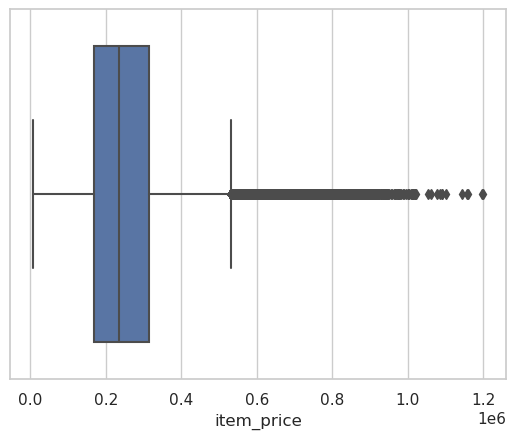

In [ ]:
sns.boxplot(x = df_transaction['item_price'])

In [ ]:
Q1 = df_transaction['item_price'].quantile(0.25)
Q2 = df_transaction['item_price'].quantile(0.5)
Q3 = df_transaction['item_price'].quantile(0.75)
IQR = df_transaction['item_price'].quantile(0.75) - df_transaction['item_price'].quantile(0.25)
minimum = Q1 - 1.5 * IQR
maximum = Q3 + 1.5 * IQR

print("Q1, Q2, Q3:", Q1, Q2, Q3)
print("Number of outliers:", len(df_transaction[(df_transaction['item_price'] < minimum) | (df_transaction['item_price'] > maximum)]))

Q1, Q2, Q3: 168373.0 233540.0 313647.0
Number of outliers: 24510


- Dựa vào biểu đồ trên và các hệ số Q1, median và Q3 chúng ta có thể thấy rằng, 25% sản phẩm `item_price` có giá 168.373, tiếp theo đó là median, tức 50% giá trị tập trung tại giá 233.540, cuối cùng là mức 75% có giá 313.647. Và chúng ta có thể thấy rằng có khá nhiều giá trị outlier, tức `item_price` vượt quá mức Q3+1.5.(IQR) hay bằng 313647 + 1.5*(145274) = 531.558
- Có đến `24510` outlier xét trong cột `item_price`

Xét cột `created_at`, `shipment_date_limit`

In [ ]:
df_transaction.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,10000,2018-08-03 05:07:24.812676+00:00,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,10000,2018-08-03 01:29:03.415705+00:00,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,10000,2018-09-18 08:41:49.422380+00:00,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,0,2018-11-05 17:42:27.954235+00:00,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,0,2018-12-23 17:24:07.361785+00:00,-3.602334,120.363824,198753,55220,1,198753


In [ ]:
# Find minimum and maximum datetime values
min_datetime = df_transaction['created_at'].min()
max_datetime = df_transaction['created_at'].max()

print("Minimum datetime:", min_datetime)
print("Maximum datetime:", max_datetime)

Minimum datetime: 2016-06-30 23:18:44.792905+00:00
Maximum datetime: 2022-07-31 23:59:45.821469+00:00


- Dựa vào số liệu trên chúng ta có thể thấy ngày giao dịch bắt đầu là từ ngày 30/6/2016 đến ngày 31/7/2022. Một quãng thời gian khá dài
- Để xem rằng dữ liệu của chúng ta có phù hợp hay không, chúng ta sẽ xem xét số ngày cần giao hàng của các giao dịch là bao lâu. Tại vì rất có thể dữ liệu ngày của chúng ta bị sai.

In [ ]:
df_transaction_new = df_transaction
df_transaction_new['sub_date'] = df_transaction_new['shipment_date_limit'] - df_transaction_new['created_at']

min_datetime = df_transaction_new['sub_date'].min()
max_datetime = df_transaction_new['sub_date'].max()

print("Minimum sub date:", min_datetime)
print("Maximum sub date:", max_datetime)


Minimum sub date: 1 days 00:00:02.200453
Maximum sub date: 6 days 00:59:59.332085


- Chúng ta có thể thấy rằng thời gian nhanh nhất để thực hiện xong một đơn hàng là 1 ngày và thời gian thực hiện lâu nhất với một đơn hàng là 6 ngày. 
- Từ đó chúng ta có thể thấy rằng dữ liệu của chúng ta phù hợp, không có trường hợp lỗi.

Chúng ta thử xét xu hướng mua hàng của bộ dữ liệu như thế nào theo hàng tuần

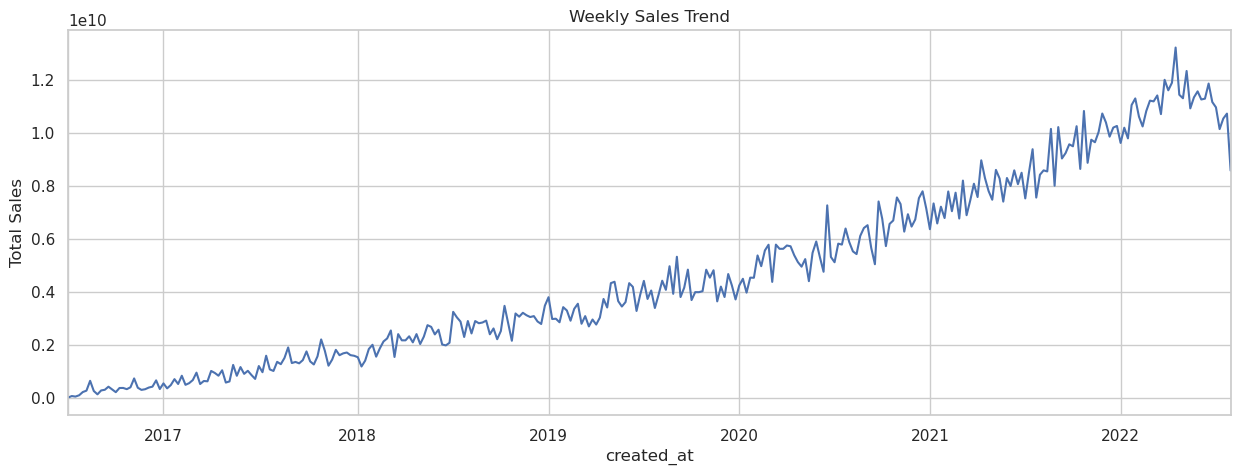

In [ ]:
# Weekly sales trend (optional)
df_transaction_trend = df_transaction
df_transaction_trend['created_at'] = pd.to_datetime(df_transaction_trend['created_at'])
df_transaction_trend.set_index('created_at', inplace=True)

plt.figure(figsize=(15, 5))

weekly_sales = df_transaction_trend['total_amount'].resample('W').sum()
weekly_sales.plot()
plt.title('Weekly Sales Trend')
plt.ylabel('Total Sales')
plt.show()

Chúng ta có thể thấy rằng hoạt động kinh doanh của công ty khá tốt, xu hướng mua hàng ngày càng tăng. Và trong giai đoạn dịch covid-19 là thời điểm mà hoạt động của sàn thương mại điện tử mạnh nhất. Tuy nhiên trong cuối năm 2022 chúng ta có thể thấy sự suy giảm của nó, có thể là do các quốc gia không còn hạn chế ra ngoài đường nữa.

### **_03.2. Categorical columns distribution:_**